# Importing the libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Get the data on tokenized transcripts
tokenized_trns = pd.read_csv("data\BoW-tokenized-transcripts.csv")
tokenized_trns["Lenght"] = tokenized_trns["tokenized_transcript"].apply(lambda val: len(val))
tokenized_trns.head(10)

C:\Users\Mert\AppData\Local\Temp\ipykernel_25388\110991592.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M').sum()


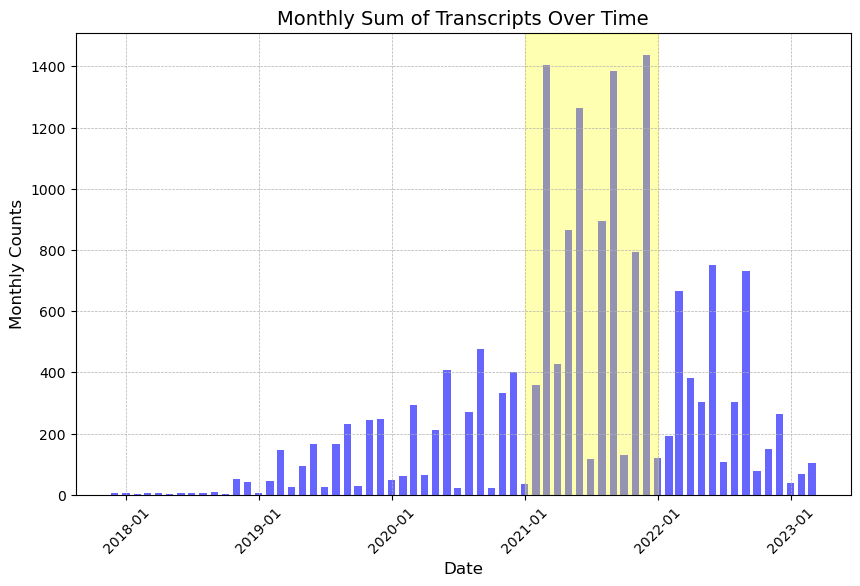

In [17]:
import matplotlib.dates as mdates

count_df = tokenized_trns.groupby("Origin_Date").count()["tokenized_transcript"]
count_df.index = pd.to_datetime(count_df.index)
df = pd.DataFrame(count_df).reset_index()
# Convert 'Origin_Date' to datetime
df['Origin_Date'] = pd.to_datetime(df['Origin_Date'])
# Set 'Origin_Date' as the index
df.set_index('Origin_Date', inplace=True)
# Resample and sum by month
monthly_counts = df.resample('M').sum()


# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_counts.index, monthly_counts['tokenized_transcript'], color='blue', alpha=0.6, width=20)

# Formatting the plot
ax.set_title('Monthly Sum of Transcripts Over Time', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Monthly Counts', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Highlighting the year between 2021 and 2022
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2022-01-01')
ax.axvspan(start_date, end_date, color='yellow', alpha=0.3)  # Using a light yellow to highlight

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

In [ ]:
#Extracting the tokens from the LM dictionary
lm_dict = pd.read_csv("data\Loughran-McDonald_MasterDictionary_1993-2023.csv")
positive_LM_tokens = [token.lower() for token in lm_dict[lm_dict["Positive"] > 0]["Word"].tolist()]
negative_LM_tokens = [token.lower() for token in lm_dict[lm_dict["Negative"] > 0]["Word"].tolist()]
all_LM_tokens = positive_LM_tokens + negative_LM_tokens
all_LM_tokens

In [ ]:
tokenized_trns = tokenized_trns.sort_values("Origin_Date")
tokenized_trns = tokenized_trns.set_index('Origin_Date')
tokenized_trns['tokenized_transcript'] = tokenized_trns['tokenized_transcript'].apply(eval)
tokenized_trns

In [ ]:
tokenized_trns[tokenized_trns["ticker"] == "GOOGL"].sort_values(["Origin_Date"])

In [ ]:
#Commented out as it takes a lot of time
#Algorithm to get the frequency of each word in the LM dictionary 
"""
word_lst = []
for j in range(len(tokenized_trns)):
    word_dict = {}
    for word in all_LM_tokens:
        i=0
        for word_tk in tokenized_trns["tokenized_transcript"][j]:
            if word_tk == word:
                i +=1
        word_dict[word] = i
    word_lst.append(word_dict)
"""

In [ ]:
#Directly reading the frequency of words from the csv file
transcripts = pd.read_csv("data\\frequency_words.csv")
transcripts["Origin_Date"] = tokenized_trns.index
transcripts.drop(["Unnamed: 0"], axis = 1,inplace = True)
transcripts.head()

In [ ]:
sum_df = pd.DataFrame(transcripts.sum())
sum_df = sum_df.rename(columns = {0 : "Frequency of words over the entire documents"})
sum_df = sum_df.iloc[:-1]
sum_df = sum_df.sort_values(["Frequency of words over the entire documents"], ascending=False)
sum_df = sum_df.reset_index().rename(columns = {"index" : "Word"})
sum_df


In [ ]:
pos_words_df = sum_df[sum_df['Word'].isin(positive_LM_tokens)]
neg_words_df = sum_df[sum_df['Word'].isin(negative_LM_tokens)]
neg_words_df.head(50)

In [25]:
#Overall tonality is positive regarding all the documents
print("Total positive words wrt LM: ", pos_words_df["Frequency of words over the entire documents"].sum())
print("Total negative words wrt LM: ", neg_words_df["Frequency of words over the entire documents"].sum())

Total positive words wrt LM:  1047338
Total negative words wrt LM:  776621


In [ ]:
transcripts["length"] = tokenized_trns["Lenght"].values
transcripts.head()

In [ ]:
transcripts["Positive_Frequency"] = transcripts[positive_LM_tokens].sum(axis = 1)/transcripts["length"]
transcripts["Negative_Frequency"] = transcripts[negative_LM_tokens].sum(axis = 1)/transcripts["length"]
transcripts["Relative"] = transcripts["Positive_Frequency"]/transcripts["Negative_Frequency"]
transcripts.replace([np.inf, -np.inf], np.nan, inplace=True)
sent_analysis_df = transcripts[["Origin_Date","Positive_Frequency","Negative_Frequency","Relative"]].dropna()
sent_analysis_df.head()

C:\Users\Mert\AppData\Local\Temp\ipykernel_25388\505295784.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = sent_df.resample('M').mean()


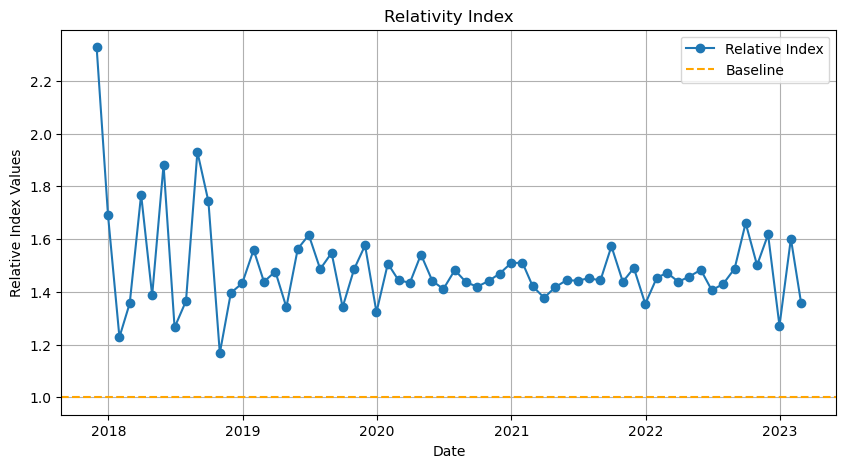

In [28]:
# Convert 'Origin Date' to datetime and set as index
sent_analysis_df['Origin_Date'] = pd.to_datetime(sent_analysis_df['Origin_Date'])
sent_df = sent_analysis_df.set_index('Origin_Date')

# Resample and sum the frequencies monthly
monthly_data = sent_df.resample('M').mean()

# Plotting
plt.figure(figsize=(10, 5))

# Plotting the Relative Index data
plt.plot(monthly_data.index, monthly_data['Relative'], label='Relative Index', marker='o')

# Add a dashed horizontal line at y=1
plt.axhline(y=1, color='orange', linestyle='--', label='Baseline')

# Adding plot title, labels, and grid
plt.title('Relativity Index')
plt.xlabel('Date')
plt.ylabel('Relative Index Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [29]:
print("Average number of words per transcript: ",round(np.mean(transcripts["length"])))

Average number of words per transcript:  25035


In [ ]:
#Creating the probabilities for positive words: strong, improvement, opportunity, optimistic, progress and gain
pos_df = transcripts[["Origin_Date","length","strong","improvement","opportunity","optimistic","progress","gain"]]
pos_df["strong_freq"] = pos_df["strong"]/pos_df["length"]
pos_df["improvement_freq"] = pos_df["improvement"]/pos_df["length"]
pos_df["opportunity_freq"] = pos_df["opportunity"]/pos_df["length"]
pos_df["optimistic_freq"] = pos_df["optimistic"]/pos_df["length"]
pos_df["progress_freq"] = pos_df["progress"]/pos_df["length"]
pos_df["gain_freq"] = pos_df["gain"]/pos_df["length"]
pos_df

In [ ]:
#Creating the probabilities for negative words: difficult, challange, decline, loss, slowdown and crisis
neg_df = transcripts[["Origin_Date","length","difficult","challenge","decline","loss","slowdown","crisis"]]
neg_df["difficult_freq"] = neg_df["difficult"]/neg_df["length"]
neg_df["challenge_freq"] = neg_df["challenge"]/pos_df["length"]
neg_df["decline_freq"] = neg_df["decline"]/neg_df["length"]
neg_df["loss_freq"] = neg_df["loss"]/neg_df["length"]
neg_df["slowdown_freq"] = neg_df["slowdown"]/neg_df["length"]
neg_df["crisis_freq"] = neg_df["crisis"]/neg_df["length"]
neg_df

In [ ]:
#Frequency of the word at the corresponding date per document
pos_df = pos_df.groupby("Origin_Date").mean().reset_index()
pos_df['Origin_Date'] = pd.to_datetime(pos_df['Origin_Date'])
pos_df.set_index('Origin_Date', inplace=True)
pos_df.head(10)

In [ ]:
#Creating the dataframes for positive words: strong, improvement, opportunity, optimistic, progress and gain


#"Strong" dataframe
strong_df = pd.DataFrame(pos_df["strong_freq"]).reset_index()
strong_df['Origin_Date'] = pd.to_datetime(strong_df['Origin_Date'])
# Resampling by month and summing the frequencies
strong_df.set_index('Origin_Date', inplace=True)
monthly_data_strong = strong_df.resample('M').sum().reset_index()

#"Improvement" dataframe
improvement_df = pd.DataFrame(pos_df["improvement_freq"]).reset_index()
improvement_df['Origin_Date'] = pd.to_datetime(improvement_df['Origin_Date'])
# Resampling by month and summing the frequencies
improvement_df.set_index('Origin_Date', inplace=True)
monthly_data_improv = improvement_df.resample('M').sum().reset_index()

#"Opportunity" dataframe
opp_df = pd.DataFrame(pos_df["opportunity_freq"]).reset_index()
opp_df['Origin_Date'] = pd.to_datetime(opp_df['Origin_Date'])
# Resampling by month and summing the frequencies
opp_df.set_index('Origin_Date', inplace=True)
monthly_data_opp = opp_df.resample('M').sum().reset_index()

#"Optimistic" dataframe
opt_df = pd.DataFrame(pos_df["optimistic_freq"]).reset_index()
opt_df['Origin_Date'] = pd.to_datetime(opt_df['Origin_Date'])
# Resampling by month and summing the frequencies
opt_df.set_index('Origin_Date', inplace=True)
monthly_data_opt = opt_df.resample('M').sum().reset_index()

#"Progress" dataframe
prg_df = pd.DataFrame(pos_df["progress_freq"]).reset_index()
prg_df['Origin_Date'] = pd.to_datetime(prg_df['Origin_Date'])
# Resampling by month and summing the frequencies
prg_df.set_index('Origin_Date', inplace=True)
monthly_data_prg = prg_df.resample('M').sum().reset_index()

#"Gain" dataframe
gain_df = pd.DataFrame(pos_df["gain_freq"]).reset_index()
gain_df['Origin_Date'] = pd.to_datetime(gain_df['Origin_Date'])
# Resampling by month and summing the frequencies
gain_df.set_index('Origin_Date', inplace=True)
monthly_data_gain = gain_df.resample('M').sum().reset_index()



In [ ]:
neg_df = neg_df.groupby("Origin_Date").mean().reset_index()
neg_df['Origin_Date'] = pd.to_datetime(neg_df['Origin_Date'])
neg_df.set_index('Origin_Date', inplace=True)
neg_df.head(10)


In [ ]:
#Creating the dataframes for negative words: difficult, challange, decline, loss, slowdown and crisis


#"Difficult" dataframe
diff_df = pd.DataFrame(neg_df["difficult_freq"]).reset_index()
diff_df['Origin_Date'] = pd.to_datetime(diff_df['Origin_Date'])
# Resampling by month and summing the frequencies
diff_df.set_index('Origin_Date', inplace=True)
monthly_data_diff = diff_df.resample('M').sum().reset_index()

#"Challange" dataframe
ch_df = pd.DataFrame(neg_df["challenge_freq"]).reset_index()
ch_df['Origin_Date'] = pd.to_datetime(ch_df['Origin_Date'])
# Resampling by month and summing the frequencies
ch_df.set_index('Origin_Date', inplace=True)
monthly_data_ch = ch_df.resample('M').sum().reset_index()

#"Decline" dataframe
dec_df = pd.DataFrame(neg_df["decline_freq"]).reset_index()
dec_df['Origin_Date'] = pd.to_datetime(dec_df['Origin_Date'])
# Resampling by month and summing the frequencies
dec_df.set_index('Origin_Date', inplace=True)
monthly_data_dec = dec_df.resample('M').sum().reset_index()

#"Loss" dataframe
loss_df = pd.DataFrame(neg_df["loss_freq"]).reset_index()
loss_df['Origin_Date'] = pd.to_datetime(loss_df['Origin_Date'])
# Resampling by month and summing the frequencies
loss_df.set_index('Origin_Date', inplace=True)
monthly_data_loss = loss_df.resample('M').sum().reset_index()

#"Slowdown" dataframe
slow_df = pd.DataFrame(neg_df["slowdown_freq"]).reset_index()
slow_df['Origin_Date'] = pd.to_datetime(slow_df['Origin_Date'])
# Resampling by month and summing the frequencies
slow_df.set_index('Origin_Date', inplace=True)
monthly_data_slow = slow_df.resample('M').sum().reset_index()

#"Crisis" dataframe
crisis_df = pd.DataFrame(neg_df["crisis_freq"]).reset_index()
crisis_df['Origin_Date'] = pd.to_datetime(crisis_df['Origin_Date'])
# Resampling by month and summing the frequencies
crisis_df.set_index('Origin_Date', inplace=True)
monthly_data_crisis = crisis_df.resample('M').sum().reset_index()



In [ ]:
ff_data = pd.read_csv("data\F-F_Research_Data_Factors_daily.csv")
ff_data['date'] = pd.to_datetime(ff_data['Unnamed: 0'].astype(str), format='%Y%m%d')

# Format the date to 'YYYY-MM-DD'
ff_data['date'] = ff_data['date'].dt.strftime('%Y-%m-%d')
ff_data['date'] = pd.to_datetime(ff_data["date"])
ff_data = ff_data.drop("Unnamed: 0", axis = 1)

#Adding the market return to the data
ff_data["ret"] = ff_data["Mkt-RF"]/100 + ff_data["RF"]/100
ff_data

#Monthly returns
ff_data = ff_data[["date","ret"]]
ff_data['date'] = pd.to_datetime(ff_data['date'])
ff_data.set_index('date', inplace=True)

# Calculate the compounded monthly returns
# (1 + daily returns).cumprod() gives the cumulative return factor
# resample('M') groups by month
# last() takes the last cumulative product of the month - the first one gives the monthly return factor
# subtract 1 to get the monthly return
monthly_returns = (1 + ff_data['ret']).resample('M').prod() - 1

#Getting the right dates
filtered_df = monthly_returns[(monthly_returns.index >= "2017-11-30") & (monthly_returns.index <= "2023-02-28")]
fil_df = pd.DataFrame(filtered_df)
fil_df.index = pd.to_datetime(fil_df.index)
fil_df = fil_df.reset_index()
fil_df

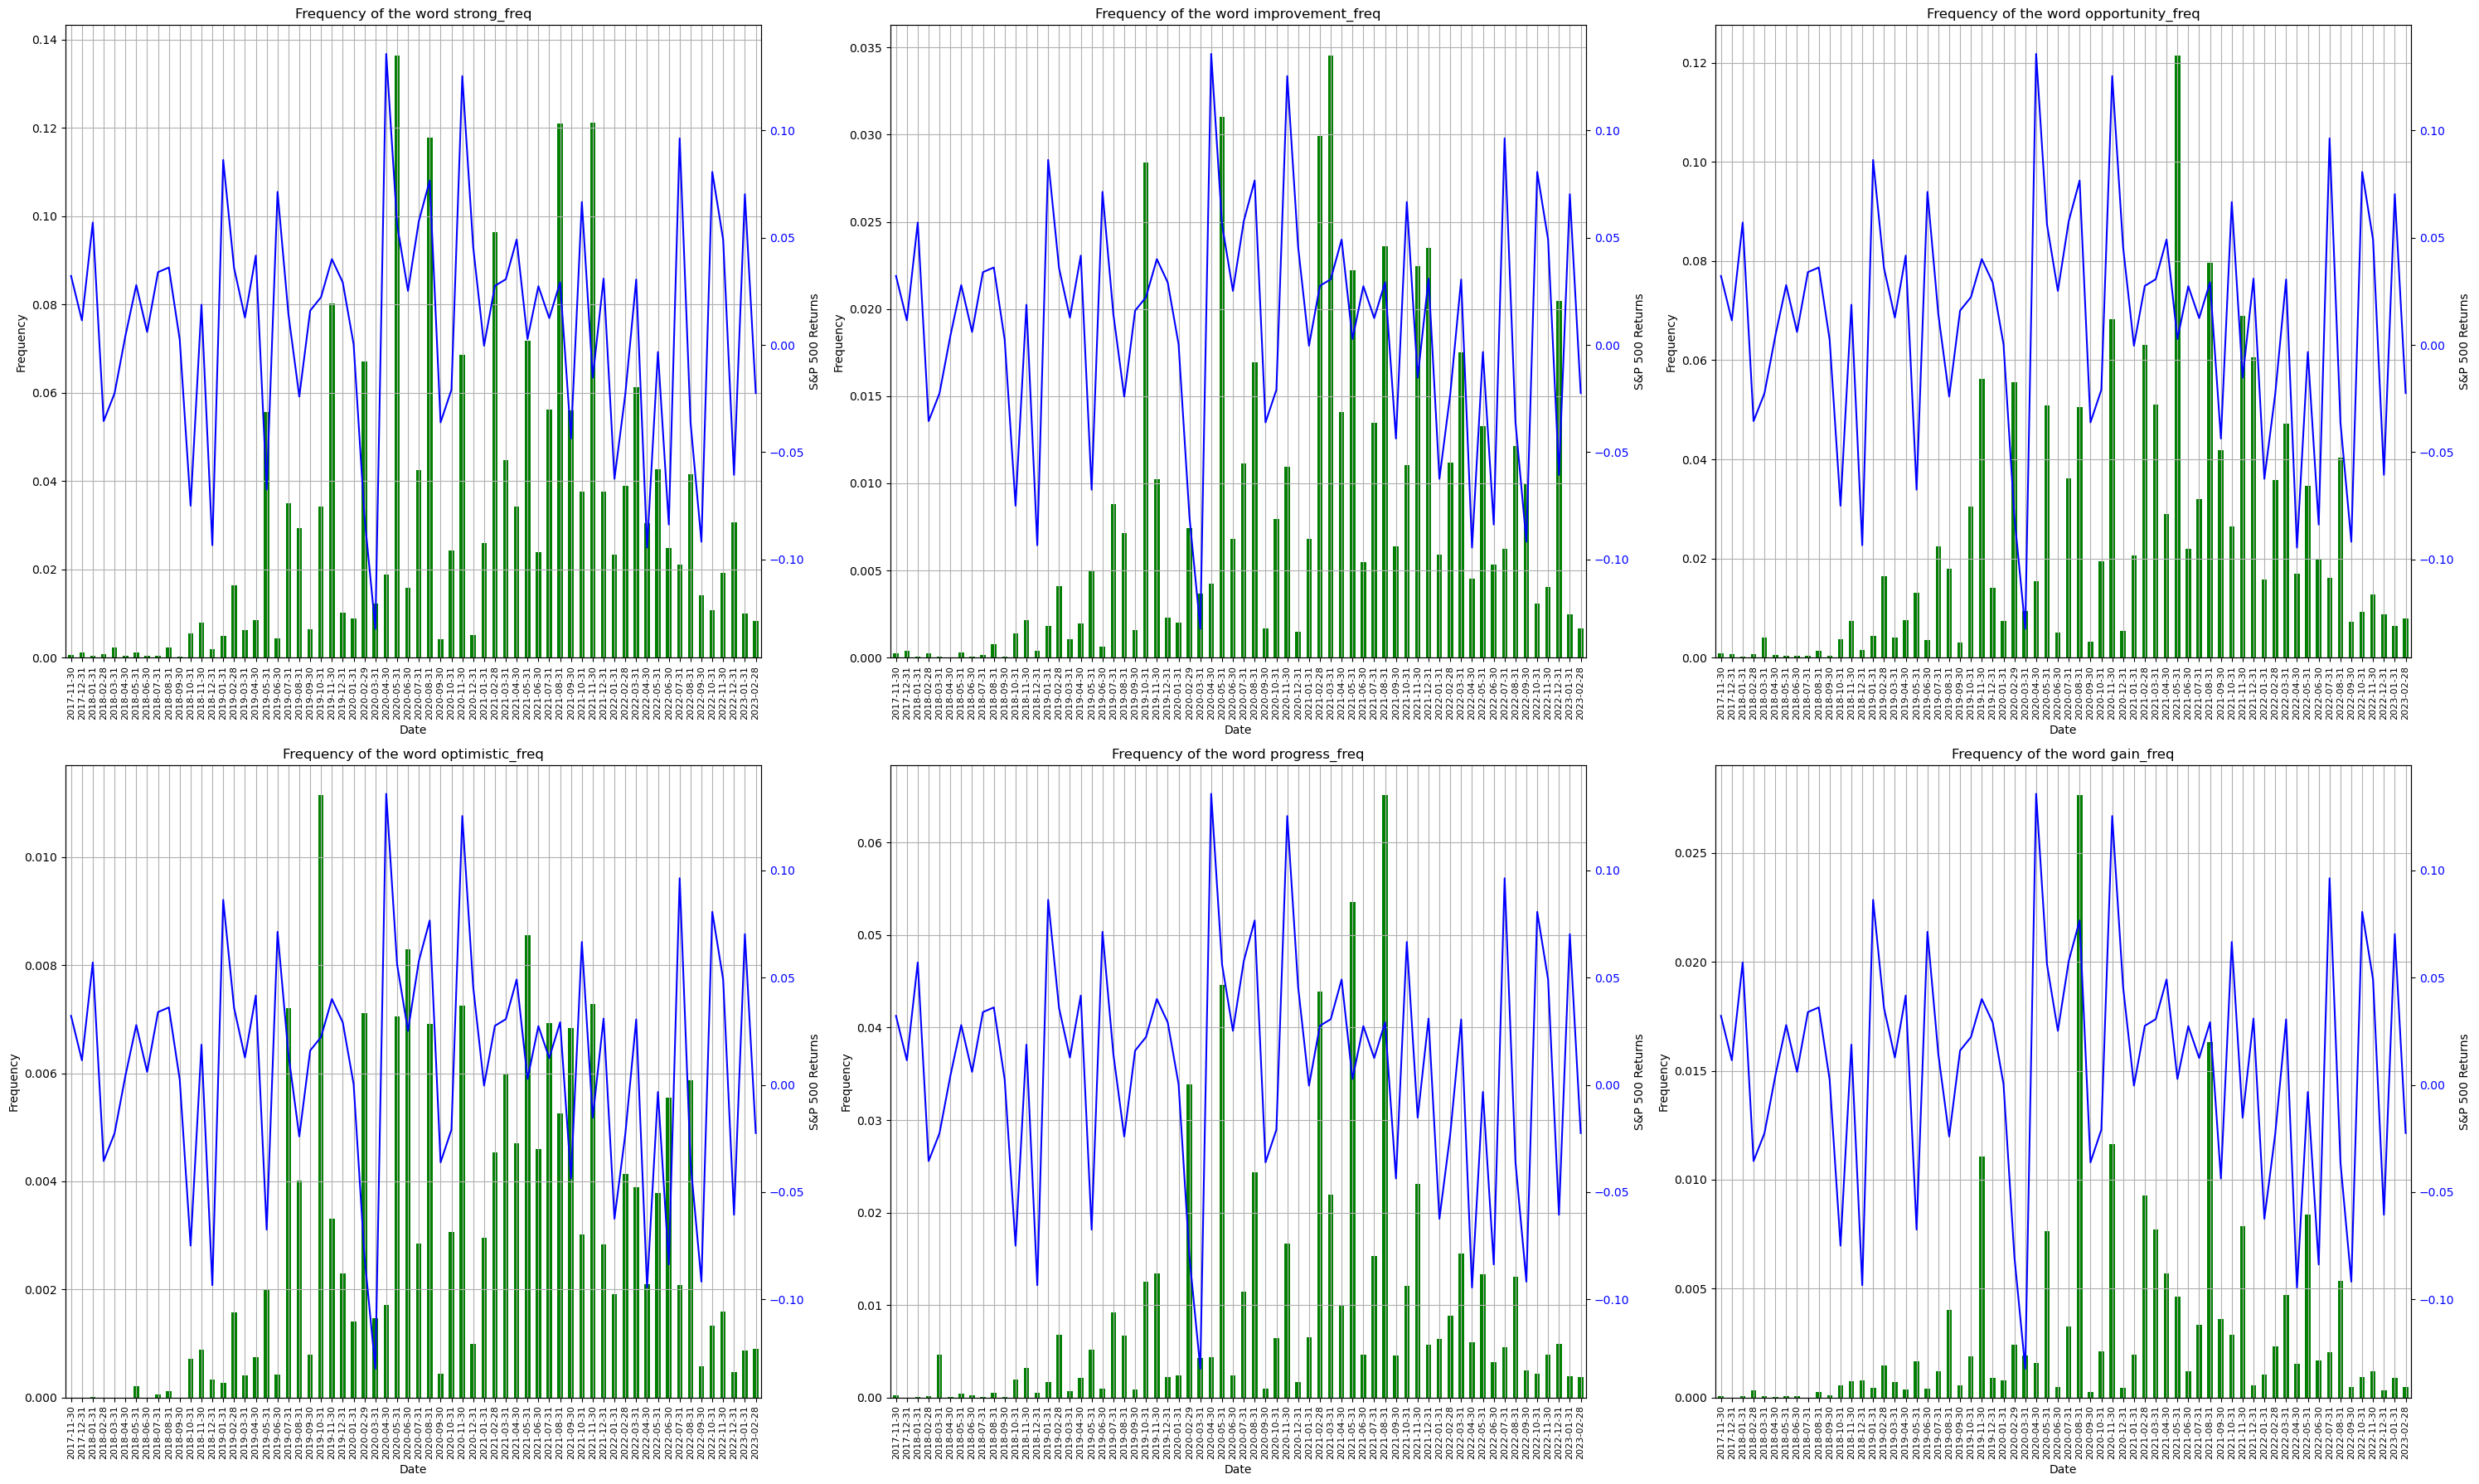

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 18))
pos_dfs = [monthly_data_strong, monthly_data_improv, monthly_data_opp, monthly_data_opt, monthly_data_prg, monthly_data_gain]

for ax, df in zip(axes.flatten(), pos_dfs):
    # Plotting the word frequency
    df.plot(x="Origin_Date", kind='bar', ax=ax, legend=False, color='green')

    # Plotting the S&P 500 returns
    ax2 = ax.twinx()  # Create a twin Axes sharing the xaxis
    ax2.plot(fil_df.index, fil_df['ret'], color='blue', label='S&P 500 Returns')
    ax2.set_ylabel('S&P 500 Returns')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Formatting
    word = df.columns[1]
    ax.set_title(f'Frequency of the word {word}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Frequency')
    ax.xaxis.set_major_formatter(plt.FixedFormatter(df['Origin_Date'].dt.strftime('%Y-%m-%d')))
    ax.tick_params(axis='x', labelsize=8)
    ax.grid(True)

# Improve the layout
plt.tight_layout()
plt.show()


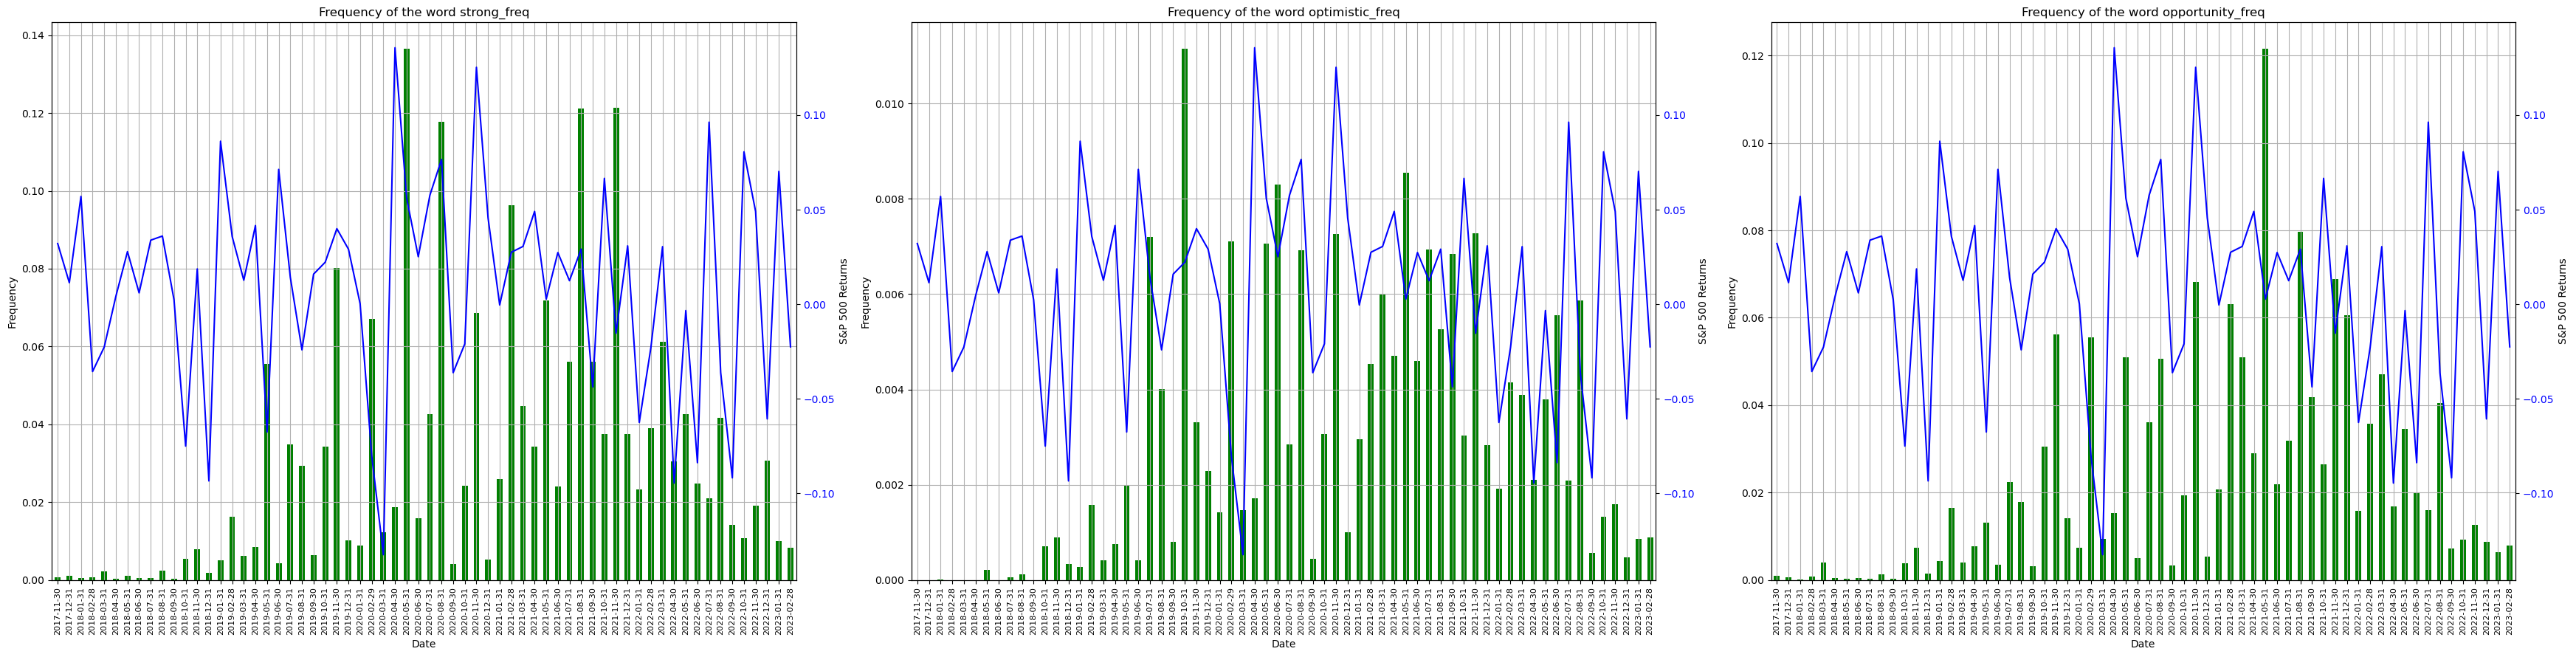

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(35, 9))
dfs = [monthly_data_strong,monthly_data_opt,monthly_data_opp]

for ax, df in zip(axes.flatten(), dfs):
    # Plotting the word frequency
    df.plot(x="Origin_Date", kind='bar', ax=ax, legend=False, color='green')

    # Plotting the S&P 500 returns
    ax2 = ax.twinx()  # Create a twin Axes sharing the xaxis
    ax2.plot(fil_df.index, fil_df['ret'], color='blue', label='S&P 500 Returns')
    ax2.set_ylabel('S&P 500 Returns')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Formatting
    word = df.columns[1]
    ax.set_title(f'Frequency of the word {word}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Frequency')
    ax.xaxis.set_major_formatter(plt.FixedFormatter(df['Origin_Date'].dt.strftime('%Y-%m-%d')))
    ax.tick_params(axis='x', labelsize=8)
    ax.grid(True)

# Improve the layout
plt.tight_layout()
plt.show()

In [ ]:
#Calculating the correlations between positive word frequency and monthly returns

strong_df_merge = pd.merge(pos_dfs[0].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")
improv_df_merge = pd.merge(pos_dfs[1].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")
opp_df_merge = pd.merge(pos_dfs[2].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")
opt_df_merge = pd.merge(pos_dfs[3].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")
prg_df_merge = pd.merge(pos_dfs[4].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")
gain_df_merge = pd.merge(pos_dfs[5].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")

cor_strong = strong_df_merge['strong_freq'].corr(strong_df_merge['ret'])
cor_imp = improv_df_merge['improvement_freq'].corr(improv_df_merge['ret'])
cor_opp = opp_df_merge['opportunity_freq'].corr(opp_df_merge['ret'])
cor_opt = opt_df_merge['optimistic_freq'].corr(opt_df_merge['ret'])
cor_prg = prg_df_merge['progress_freq'].corr(prg_df_merge['ret'])
cor_gain = gain_df_merge['gain_freq'].corr(gain_df_merge['ret'])

key_lst = ['strong_freq','improvement_freq','opportunity_freq','optimistic_freq','progress_freq','gain_freq']
pos_cor = [cor_strong,cor_imp,cor_opp,cor_opt,cor_prg,cor_gain]

pos_dict = dict(zip(key_lst, pos_cor))
pos_dict

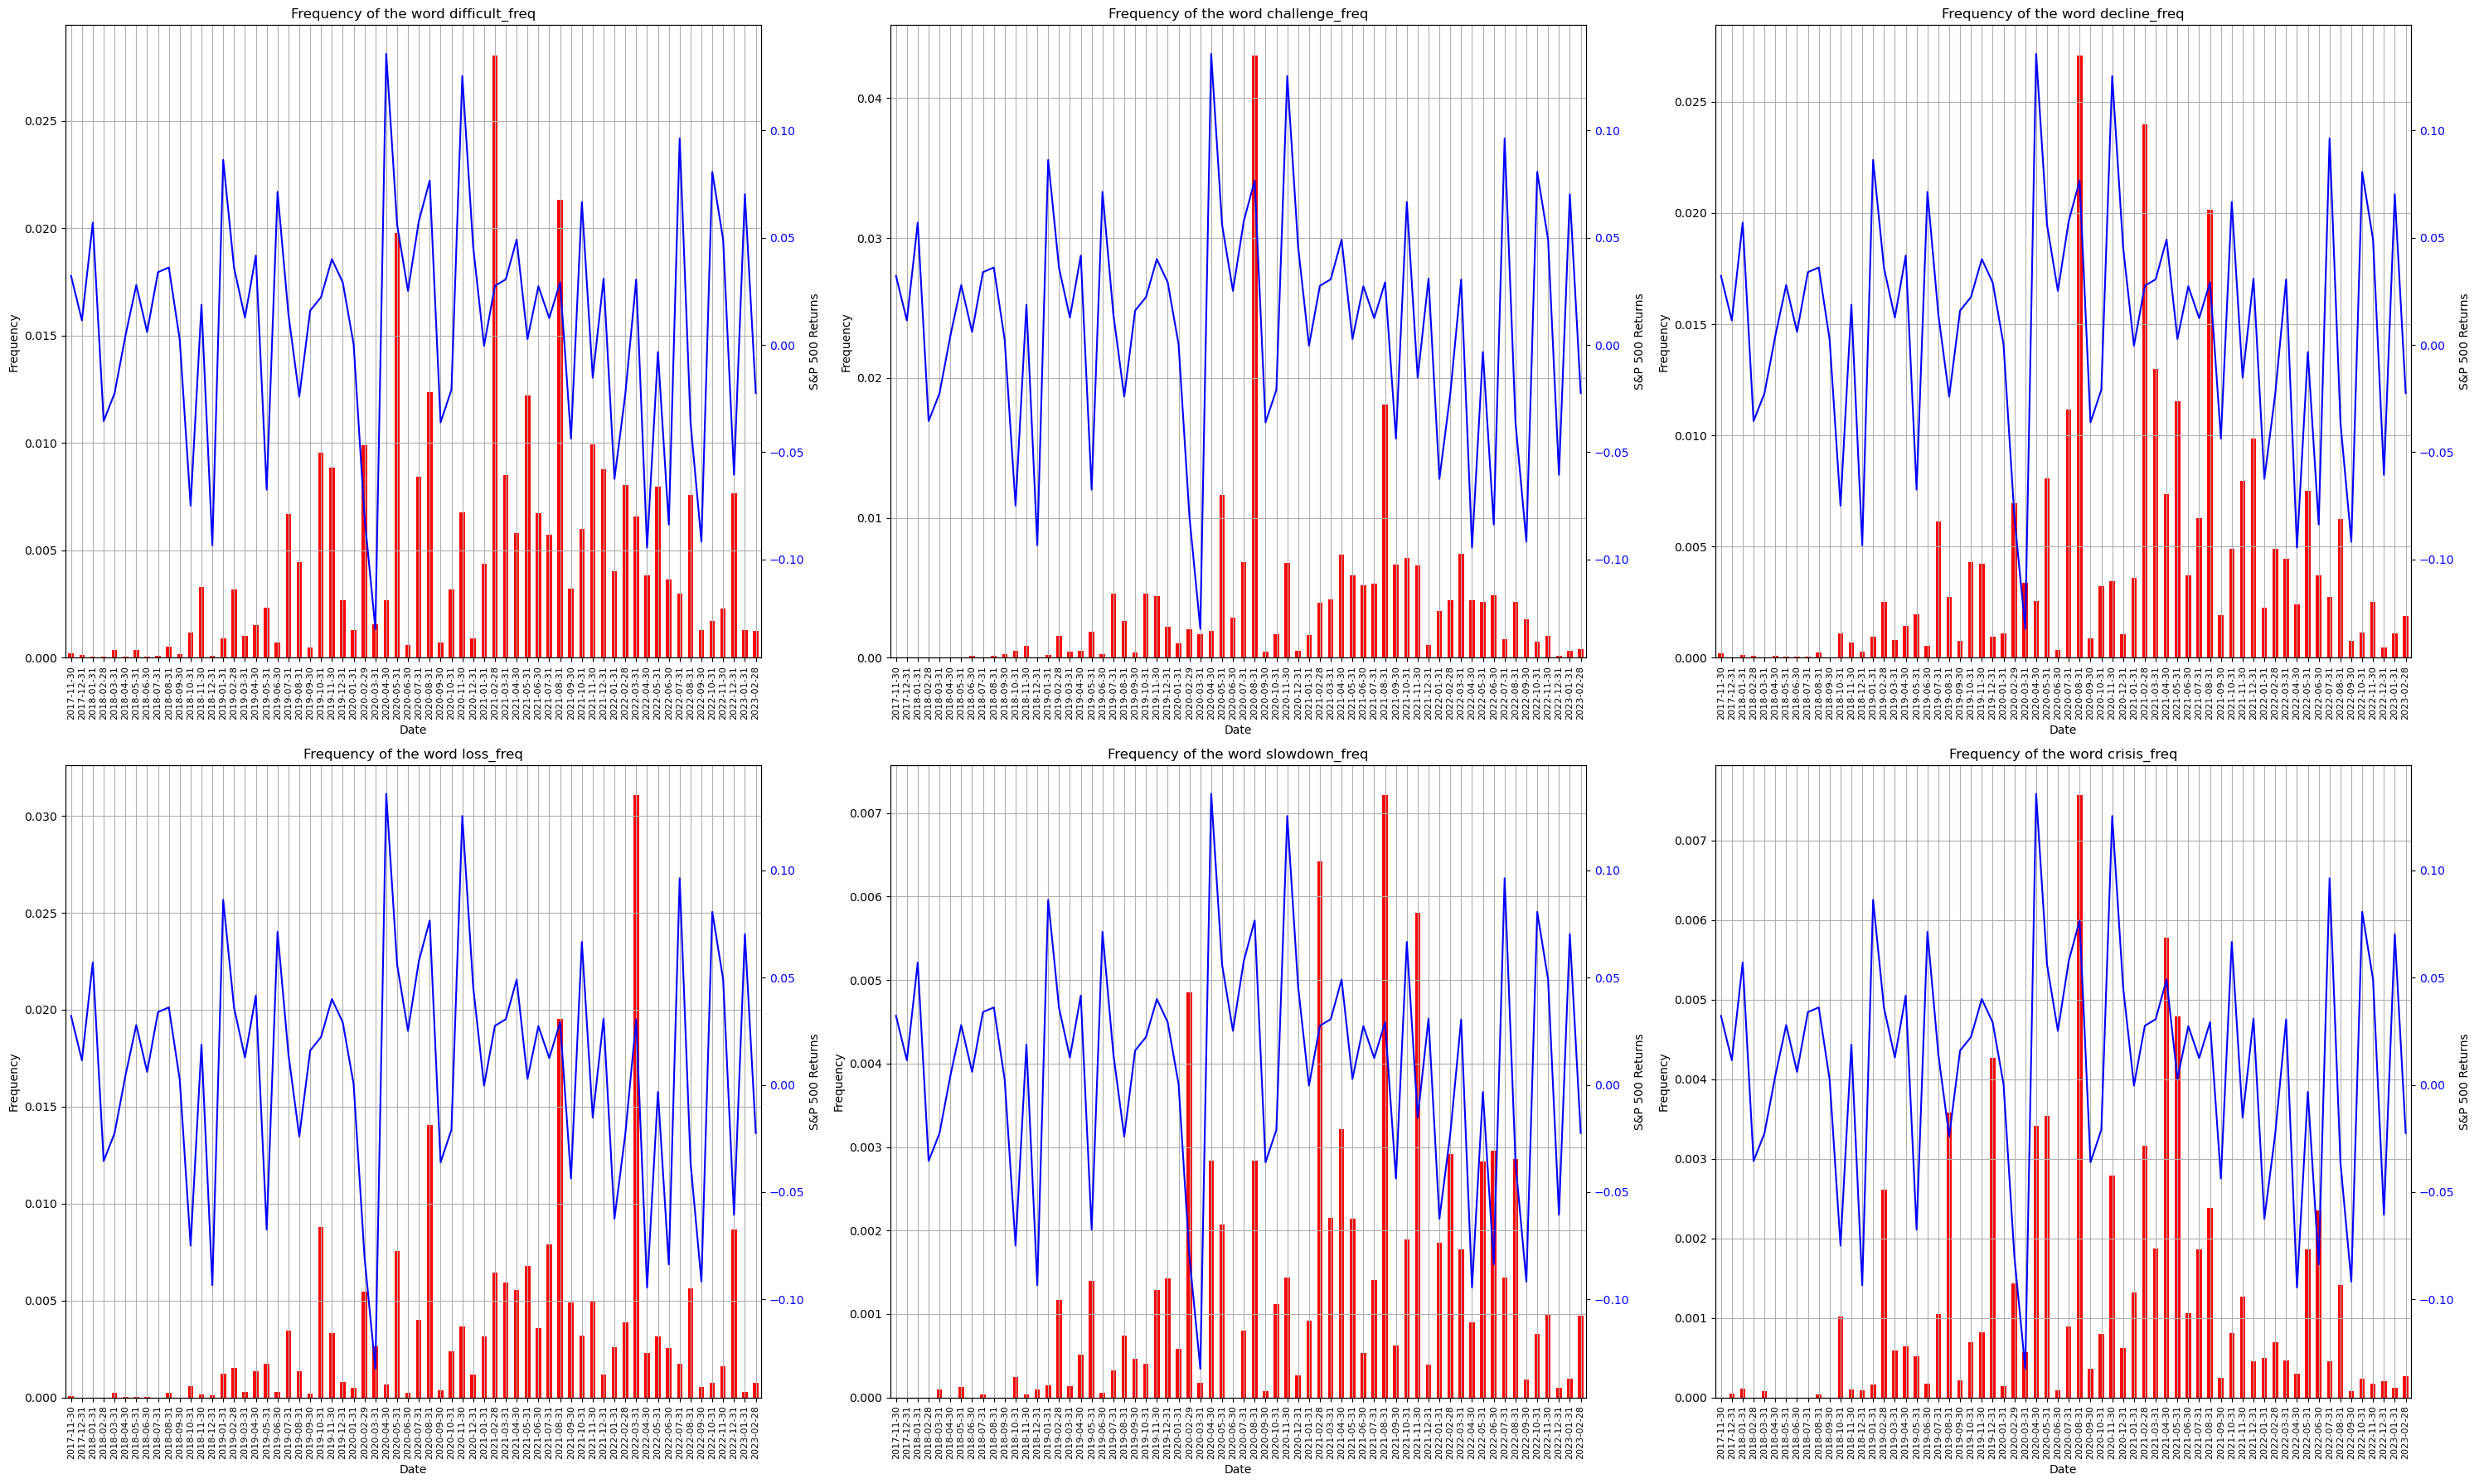

In [40]:
#Plotting the frequency of negative words over time

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 18))
neg_dfs = [monthly_data_diff, monthly_data_ch, monthly_data_dec, monthly_data_loss, monthly_data_slow, monthly_data_crisis]


# Flatten the axes array and plot each DataFrame in its own subplot
for ax, df in zip(axes.flatten(), neg_dfs):
    df.plot(x='Origin_Date', kind='bar', ax=ax, legend=False, color='red')

    ax2 = ax.twinx()  # Create a twin Axes sharing the xaxis
    ax2.plot(fil_df.index, fil_df['ret'], color='blue', label='S&P 500 Returns')
    ax2.set_ylabel('S&P 500 Returns')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    word = df.columns[1]
    ax.set_title(f'Frequency of the word {word}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Frequency')
    ax.xaxis.set_major_formatter(plt.FixedFormatter(df['Origin_Date'].dt.strftime('%Y-%m-%d')))
    
    # Reduce font size of the date labels
    ax.tick_params(axis='x', labelsize=8)  # Adjust labelsize to your preference

    ax.grid(True)

plt.tight_layout()
plt.show()

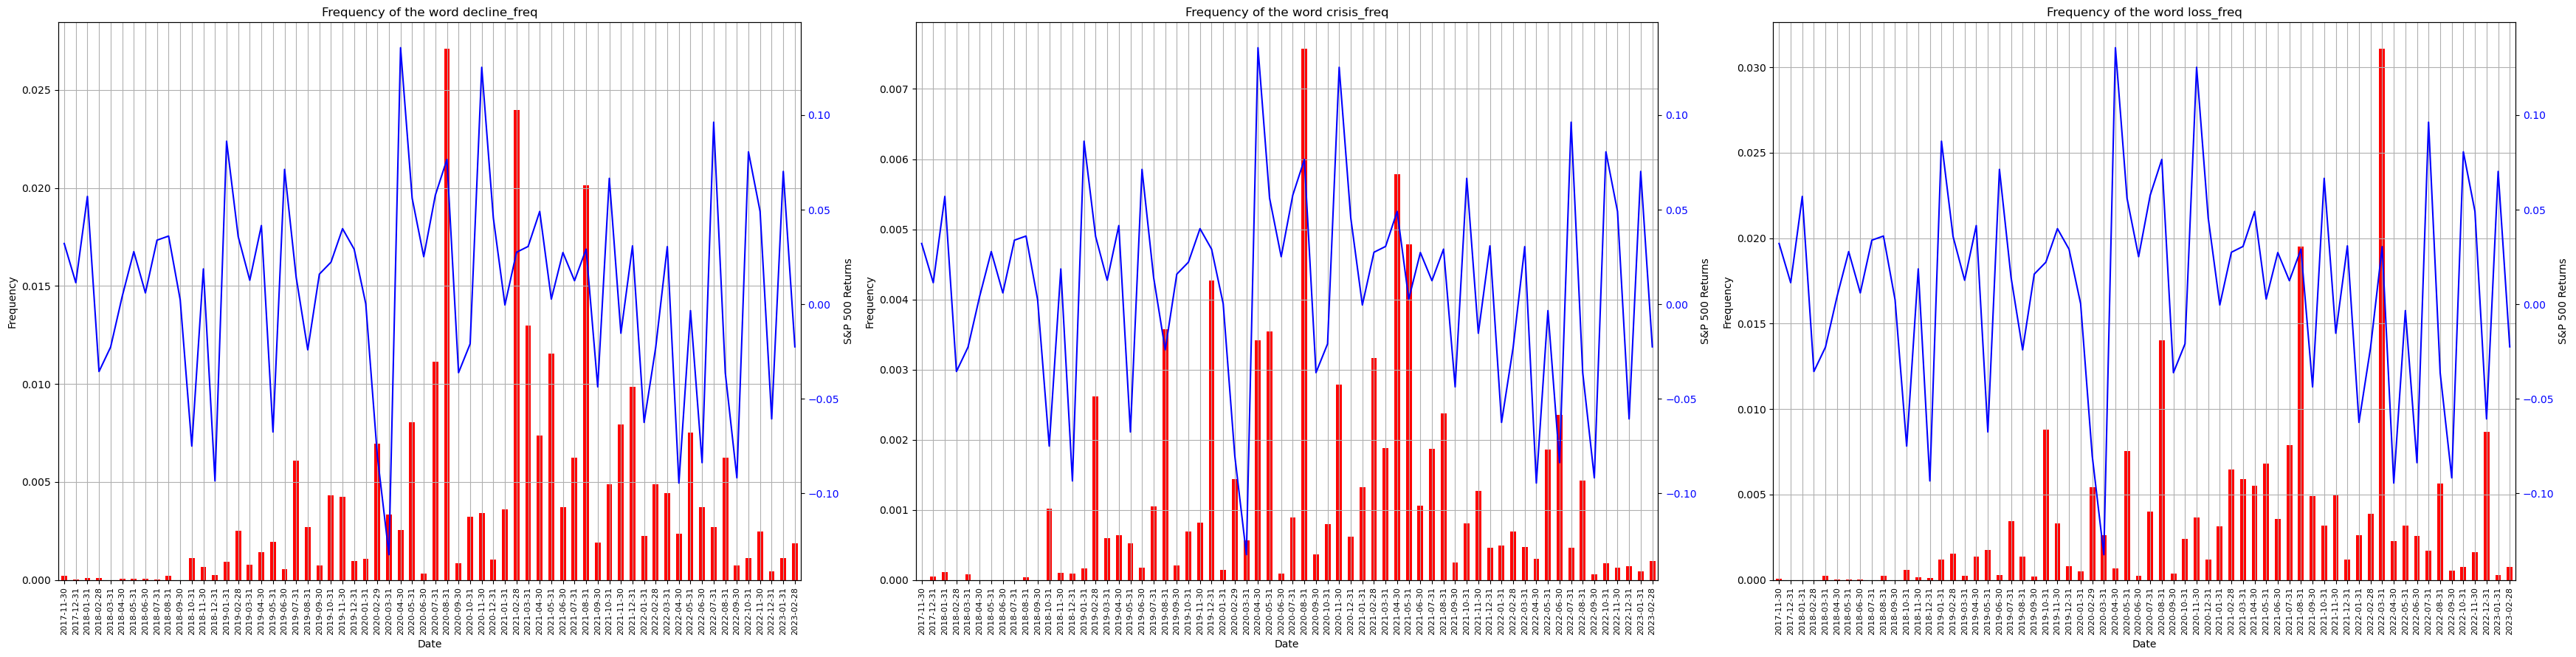

In [41]:
#Plotting the frequency of negative words over time

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(35, 9))
dfs = [monthly_data_dec, monthly_data_crisis,monthly_data_loss ]


# Flatten the axes array and plot each DataFrame in its own subplot
for ax, df in zip(axes.flatten(), dfs):
    df.plot(x='Origin_Date', kind='bar', ax=ax, legend=False, color='red')

    ax2 = ax.twinx()  # Create a twin Axes sharing the xaxis
    ax2.plot(fil_df.index, fil_df['ret'], color='blue', label='S&P 500 Returns')
    ax2.set_ylabel('S&P 500 Returns')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    word = df.columns[1]
    ax.set_title(f'Frequency of the word {word}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Frequency')
    ax.xaxis.set_major_formatter(plt.FixedFormatter(df['Origin_Date'].dt.strftime('%Y-%m-%d')))
    
    # Reduce font size of the date labels
    ax.tick_params(axis='x', labelsize=8)  # Adjust labelsize to your preference

    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Calculating the correlations between negative word frequency and monthly returns

diff_df_merge = pd.merge(neg_dfs[0].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")
ch_df_merge = pd.merge(neg_dfs[1].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")
dec_df_merge = pd.merge(neg_dfs[2].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")
loss_df_merge = pd.merge(neg_dfs[3].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")
slw_df_merge = pd.merge(neg_dfs[4].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")
cris_df_merge = pd.merge(neg_dfs[5].rename(columns = {"Origin_Date":"date"}), fil_df,on = "date")

cor_diff = diff_df_merge['difficult_freq'].corr(strong_df_merge['ret'])
cor_ch = ch_df_merge['challenge_freq'].corr(improv_df_merge['ret'])
cor_dec = dec_df_merge['decline_freq'].corr(opp_df_merge['ret'])
cor_loss = loss_df_merge['loss_freq'].corr(opt_df_merge['ret'])
cor_slw = slw_df_merge['slowdown_freq'].corr(prg_df_merge['ret'])
cor_cris = cris_df_merge['crisis_freq'].corr(gain_df_merge['ret'])

key_lst = ['difficult_freq','challenge_freq','decline_freq','loss_freq','slowdown_freq','crisis_freq']
neg_cor = [cor_diff,cor_ch,cor_dec,cor_loss,cor_slw,cor_cris]

neg_dict = dict(zip(key_lst, neg_cor))
neg_dict

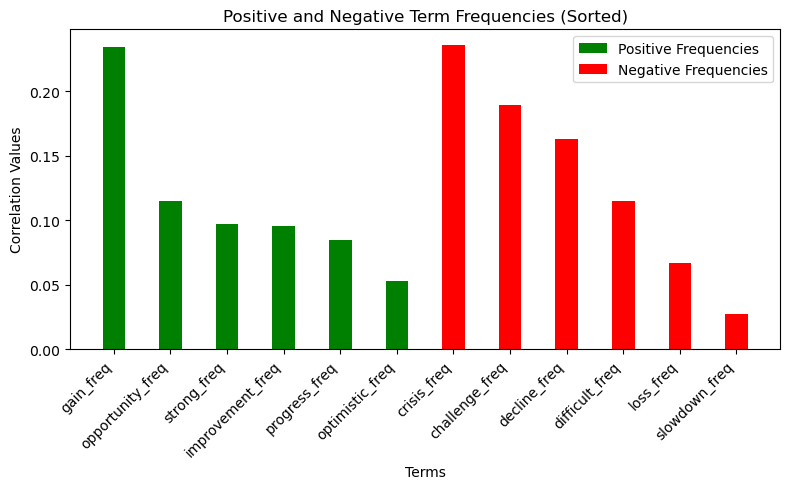

In [43]:
# Sort the pos_dict and neg_dict by values in descending order
pos_dict_sorted = dict(sorted(pos_dict.items(), key=lambda item: item[1], reverse=True))
neg_dict_sorted = dict(sorted(neg_dict.items(), key=lambda item: item[1], reverse=True))
# Extract sorted keys and values for plotting
labels_pos = list(pos_dict_sorted.keys())
values_pos = list(pos_dict_sorted.values())
labels_neg = list(neg_dict_sorted.keys())
values_neg = list(neg_dict_sorted.values())

# Position of bars on x-axis
x_pos = np.arange(len(labels_pos))
x_neg = np.arange(len(labels_neg)) + len(labels_pos)  # Offset by length of pos_dict


fig, ax = plt.subplots(figsize=(8, 5))

# Plot positive frequencies
ax.bar(x_pos, values_pos, color='green', width=0.4, label='Positive Frequencies')

# Plot negative frequencies
ax.bar(x_neg, values_neg, color='red', width=0.4, label='Negative Frequencies')

# Adding labels and title
ax.set_xlabel('Terms')
ax.set_ylabel('Correlation Values')
ax.set_title('Positive and Negative Term Frequencies (Sorted)')
ax.set_xticks(list(x_pos) + list(x_neg))
ax.set_xticklabels(labels_pos + labels_neg, rotation=45, ha='right')

# Adding legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


Next, we create the time series of average sentiment scores and visualize the distribution of the scores, also fitting a KDE curve for each of them.

In [ ]:
sent_data = pd.read_csv("data\\no_transcript_final_dataset.csv")
sent_data.rename({"ticker":"tic"}, axis = 1, inplace = True)
sent_data
#Plot sentiment scores over time
#Plot the empirical distributions of sentiment scores
#Vader Correlation plot

In [ ]:
#GHR-bigram-tf-idf
dgbti_f = sent_data[["date", "GHR-bigram-tf-idf"]]
dgbti_f['date'] = pd.to_datetime(dgbti_f['date'])
dgbti_f.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))

# Plot the histogram and KDE on the same plot
sns.histplot(dgbti_f['GHR-bigram-tf-idf'], bins=20, color='blue', kde=True, alpha=0.4, stat="density")

# Add titles and labels
plt.title('Histogram and KDE of GHR Bigram TF-IDF Values')
plt.xlabel('GHR Bigram TF-IDF Value')
plt.ylabel('Density')

# Show grid
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
monthly_avg = dgbti_f['GHR-bigram-tf-idf'].resample('M').mean()
# Prepare the first plot (TF-IDF scores)
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average GHR-bigram-tf-idf Score', color=color)
ax1.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Prepare the second plot (Monthly Returns) on a new y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Monthly Returns', color=color)  # we already handled the x-label with ax1
ax2.plot(fil_df["date"], fil_df["ret"], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Monthly Average of GHR-bigram-tf-idf Scores and Monthly Returns')

# Show the plot
plt.show()


In [ ]:
monthly_avg.reset_index()["GHR-bigram-tf-idf"].corr(fil_df["ret"])

In [ ]:
skewness = dgbti_f['GHR-bigram-tf-idf'].skew()
kurtosis = dgbti_f['GHR-bigram-tf-idf'].kurtosis()

print("Skewness of distribution:", skewness)
print("Kurtosis of distribution:", kurtosis)

In [ ]:
#GHR-bigram-unigram-tf-idf
gbuti_df = sent_data[["date", "GHR-bigram-unigram-tf-idf"]]
gbuti_df['date'] = pd.to_datetime(gbuti_df['date'])
gbuti_df.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))

# Plot the histogram and KDE on the same plot
sns.histplot(gbuti_df['GHR-bigram-unigram-tf-idf'], bins=20, color='blue', kde=True, alpha=0.4, stat="density")

# Add titles and labels
plt.title('Histogram and KDE of GHR-bigram-unigram-tf-idf Values')
plt.xlabel('GHR-bigram-unigram-tf-idf')
plt.ylabel('Density')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
monthly_avg = gbuti_df['GHR-bigram-unigram-tf-idf'].resample('M').mean()
# Prepare the first plot (TF-IDF scores)
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average GHR-bigram-unigram-tf-idf Score', color=color)
ax1.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Prepare the second plot (Monthly Returns) on a new y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Monthly Returns', color=color)  # we already handled the x-label with ax1
ax2.plot(fil_df["date"], fil_df["ret"], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Monthly Average of GHR-bigram-unigram-tf-idf Scores and Monthly Returns')

# Show the plot
plt.show()

In [ ]:
monthly_avg.reset_index()["GHR-bigram-unigram-tf-idf"].corr(fil_df["ret"])

In [ ]:
skewness = gbuti_df['GHR-bigram-unigram-tf-idf'].skew()
kurtosis = gbuti_df['GHR-bigram-unigram-tf-idf'].kurtosis()

print("Skewness of distribution:", skewness)
print("Kurtosis of distribution:", kurtosis)

In [ ]:
#GHR-bigram-LM-unigram-tf-idf
gblutd_df = sent_data[["date", "GHR-bigram-LM-unigram-tf-idf"]]
gblutd_df['date'] = pd.to_datetime(gblutd_df['date'])
gblutd_df.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))

# Plot the histogram and KDE on the same plot
sns.histplot(gblutd_df['GHR-bigram-LM-unigram-tf-idf'], bins=20, color='blue', kde=True, alpha=0.4, stat="density")

# Add titles and labels
plt.title('Histogram and KDE of GHR-bigram-LM-unigram-tf-idf Values')
plt.xlabel('GHR-bigram-LM-unigram-tf-idf')
plt.ylabel('Density')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
monthly_avg = gblutd_df['GHR-bigram-LM-unigram-tf-idf'].resample('M').mean()
# Prepare the first plot (TF-IDF scores)
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average GHR-bigram-LM-unigram-tf-idf Score', color=color)
ax1.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Prepare the second plot (Monthly Returns) on a new y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Monthly Returns', color=color)  # we already handled the x-label with ax1
ax2.plot(fil_df["date"], fil_df["ret"], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Monthly Average of GHR-bigram-LM-unigram-tf-idf Scores and Monthly Returns')

# Show the plot
plt.show()

In [ ]:
monthly_avg.reset_index()["GHR-bigram-LM-unigram-tf-idf"].corr(fil_df["ret"])

In [ ]:
skewness = gblutd_df['GHR-bigram-LM-unigram-tf-idf'].skew()
kurtosis = gblutd_df['GHR-bigram-LM-unigram-tf-idf'].kurtosis()

print("Skewness of distribution:", skewness)
print("Kurtosis of distribution:", kurtosis)

In [ ]:
#enhanced-bow
enc_df = sent_data[["date", "enhanced-bow"]]
enc_df['date'] = pd.to_datetime(enc_df['date'])
enc_df.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))

# Plot the histogram and KDE on the same plot
sns.histplot(enc_df['enhanced-bow'], bins=20, color='blue', kde=True, alpha=0.4, stat="density")

# Add titles and labels
plt.title('Histogram and KDE of enhanced-bow Values')
plt.xlabel('Enhanced-bow Value')
plt.ylabel('Density')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
monthly_avg = enc_df['enhanced-bow'].resample('M').mean()
# Prepare the first plot (TF-IDF scores)
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average enhanced-bow Score', color=color)
ax1.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Prepare the second plot (Monthly Returns) on a new y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Monthly Returns', color=color)  # we already handled the x-label with ax1
ax2.plot(fil_df["date"], fil_df["ret"], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Monthly Average of enhanced-bow Scores and Monthly Returns')

# Show the plot
plt.show()

In [ ]:
monthly_avg.reset_index()["enhanced-bow"].corr(fil_df["ret"])

In [ ]:
skewness = enc_df['enhanced-bow'].skew()
kurtosis = enc_df['enhanced-bow'].kurtosis()

print("Skewness of distribution:", skewness)
print("Kurtosis of distribution:", kurtosis)

In [ ]:
#vader-standardized
vader_df = sent_data[["date", "vader-standardized"]]
vader_df['date'] = pd.to_datetime(vader_df['date'])
vader_df.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))

# Plot the histogram and KDE on the same plot
sns.histplot(vader_df['vader-standardized'], bins=20, color='blue', kde=True, alpha=0.4, stat="density")

# Add titles and labels
plt.title('Histogram and KDE of vader-standardized Values')
plt.xlabel('vader-standardized Value')
plt.ylabel('Density')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
monthly_avg = vader_df['vader-standardized'].resample('M').mean()
# Prepare the first plot (TF-IDF scores)
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average vader-standardized Score', color=color)
ax1.plot(monthly_avg.index, monthly_avg, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Prepare the second plot (Monthly Returns) on a new y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Monthly Returns', color=color)  # we already handled the x-label with ax1
ax2.plot(fil_df["date"], fil_df["ret"], marker='o', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Monthly Average of vader-standardized Scores and Monthly Returns')

# Show the plot
plt.show()

In [ ]:
monthly_avg.reset_index()["vader-standardized"].corr(fil_df["ret"])

In [ ]:
skewness = vader_df['vader-standardized'].skew()
kurtosis = vader_df['vader-standardized'].kurtosis()

print("Skewness of distribution:", skewness)
print("Kurtosis of distribution:", kurtosis)

# Heatmap of sentiment scores

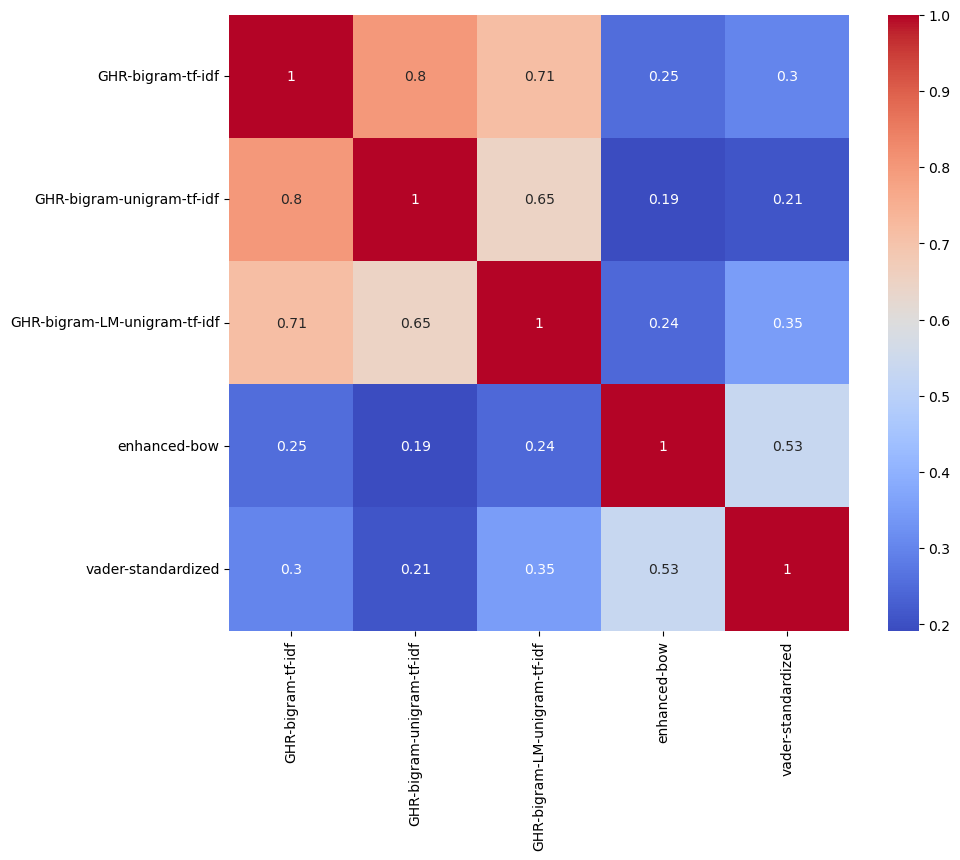

In [67]:
# Assuming df is your DataFrame
heatmap_data = sent_data.drop(columns=["q","tic","date_time","date"])

# # Assuming df is your DataFrame
correlation_matrix = heatmap_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()
# print(correlation_matrix)